<a href="https://colab.research.google.com/github/toruuno/DNN_d3d4/blob/master/4_1_tensorflow_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensolFlow

In [ ]:
!pip install tensorflow==1.15.0

## base

### constant

In [ ]:
import tensorflow as tf
import numpy as np

# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)

print(tf.__version__)

sess = tf.Session()

print('a:', sess.run(a))
print('b:', sess.run(b))
print('c:', sess.run(c))

a: Tensor("Const:0", shape=(), dtype=int32)
b: Tensor("Const_1:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_2:0", shape=(2, 2), dtype=float32)
1.15.0
a: 1
b: [[2. 2.]
 [2. 2.]
 [2. 2.]]
c: [[0. 1.]
 [2. 3.]]


### placeholder

In [ ]:
import tensorflow as tf
import numpy as np

# プレースホルダーを定義
x = tf.placeholder(dtype=tf.float32, shape=[None,3])

print('x:', x)

sess = tf.Session()

X = np.random.rand(2,3)
print('X:', X)

# プレースホルダにX[0]を入力
# shapeを(3,)から(1,3)にするためreshape
print('x:', sess.run(x, feed_dict={x:X[0].reshape(1,-1)}))
# プレースホルダにX[1]を入力
print('x:', sess.run(x, feed_dict={x:X[1].reshape(1,-1)}))

x: Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
X: [[0.37475216 0.05866816 0.73019391]
 [0.53182463 0.83790961 0.31176254]]
x: [[0.37475216 0.05866816 0.7301939 ]]
x: [[0.53182465 0.83790964 0.31176254]]


### variables

In [ ]:
# 定数を定義
a = tf.constant(10)
print('a:', a)
# 変数を定義
x = tf.Variable(1)
print('x:', x)

calc_op = x * a

# xの値を更新
update_x = tf.assign(x, calc_op)

sess = tf.Session()

# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

a: Tensor("Const_3:0", shape=(), dtype=int32)
x: <tf.Variable 'Variable:0' shape=() dtype=int32_ref>
1
10
100


## 線形回帰
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  noiseの値を変更しよう
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#パラメータ弄る為関数化
def try_0(noise=0.3,d_1=-3,d_0=2,debug=True):
    iters_num = 300
    plot_interval = 10

    # データを生成
    n = 100
    x = np.random.rand(n)
    #d = 3 * x + 2
    d = d_1 * x + d_0

    # ノイズを加える
    #noise = 0.3
    d = d + noise * np.random.randn(n) 
    print("++++++++++++++++++++++++++++++++++++++++++")
    print("{}x + {}".format(d_1,d_0))
    print("noise={}".format(noise))
    # 入力値
    xt = tf.placeholder(tf.float32)
    dt = tf.placeholder(tf.float32)

    # 最適化の対象の変数を初期化
    W = tf.Variable(tf.zeros([1]))
    b = tf.Variable(tf.zeros([1]))

    y = W * xt + b

    # 誤差関数 平均2乗誤差
    loss = tf.reduce_mean(tf.square(y - dt))
    optimizer = tf.train.GradientDescentOptimizer(0.1)
    train = optimizer.minimize(loss)

    # 初期化
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # 作成したデータをトレーニングデータとして準備
    x_train = x.reshape(-1,1)
    d_train = d.reshape(-1,1)

    # トレーニング
    for i in range(iters_num):
        sess.run(train, feed_dict={xt:x_train,dt:d_train})
        if (i+1) % plot_interval == 0:
            loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
            W_val = sess.run(W)
            b_val = sess.run(b)
            if debug: print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

    if debug: print(W_val)
    if debug: print(b_val)

    #  予測関数
    def predict(x):
        return W_val * x + b_val

    fig = plt.figure()
    subplot = fig.add_subplot(1, 1, 1)
    plt.scatter(x, d)
    linex = np.linspace(0, 1, 2)
    liney = predict(linex)
    subplot.plot(linex,liney)
    plt.show()

++++++++++++++++++++++++++++++++++++++++++
-3x + 2
noise=0.3
Generation: 10. 誤差 = 0.7404473
Generation: 20. 誤差 = 0.59454536
Generation: 30. 誤差 = 0.48162138
Generation: 40. 誤差 = 0.39399976
Generation: 50. 誤差 = 0.32601032
Generation: 60. 誤差 = 0.2732545
Generation: 70. 誤差 = 0.23231906
Generation: 80. 誤差 = 0.20055546
Generation: 90. 誤差 = 0.17590879
Generation: 100. 誤差 = 0.15678445
Generation: 110. 誤差 = 0.14194499
Generation: 120. 誤差 = 0.13043042
Generation: 130. 誤差 = 0.12149576
Generation: 140. 誤差 = 0.11456303
Generation: 150. 誤差 = 0.10918361
Generation: 160. 誤差 = 0.10500948
Generation: 170. 誤差 = 0.1017706
Generation: 180. 誤差 = 0.099257424
Generation: 190. 誤差 = 0.09730734
Generation: 200. 誤差 = 0.09579417
Generation: 210. 誤差 = 0.09462006
Generation: 220. 誤差 = 0.09370902
Generation: 230. 誤差 = 0.0930021
Generation: 240. 誤差 = 0.09245358
Generation: 250. 誤差 = 0.09202794
Generation: 260. 誤差 = 0.0916977
Generation: 270. 誤差 = 0.09144143
Generation: 280. 誤差 = 0.09124259
Generation: 290. 誤差 = 0.0910

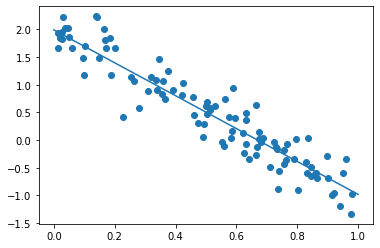

In [ ]:
#まずはデフォルト値
try_0()

++++++++++++++++++++++++++++++++++++++++++
-3x + 2
noise=0.03


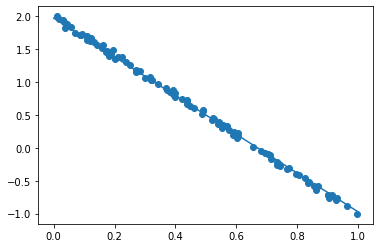

++++++++++++++++++++++++++++++++++++++++++
-3x + 2
noise=3


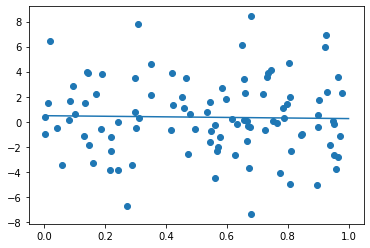

++++++++++++++++++++++++++++++++++++++++++
100x + 2
noise=0.3


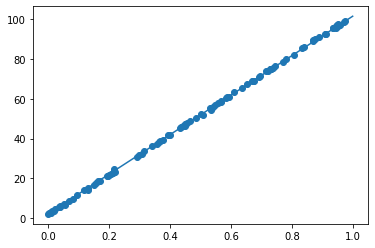

++++++++++++++++++++++++++++++++++++++++++
-3x + 100
noise=0.3


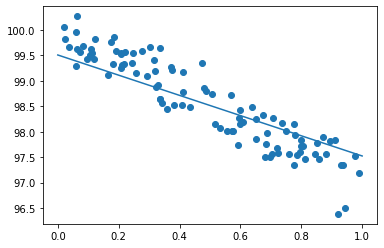

In [ ]:
#ノイズ比較(ノイズ大だと線形回帰は無理(非線形でも無理だろうけど))
try_0(noise=0.03,debug=False)
try_0(noise=3,debug=False)

#dを弄る(bias項(0次項)の影響が大きいとnoiseが目立つのかな?(結果的に))
try_0(d_1=100,debug=False)
try_0(d_0=100,debug=False)

## 非線形回帰
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  noiseの値を変更しよう
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#tryの為関数化

def try_1(noise=0.05,d_3=-0.4,d_2=1.6,d_1=-2.8,d_0=-1,debug=True):
    iters_num = 10000
    plot_interval = 100

    # データを生成
    n=100
    x = np.random.rand(n).astype(np.float32) * 4 - 2
    #d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1
    d =  d_3 * x ** 3 + d_2 * x ** 2 + d_1 * x + d_0

    #  ノイズを加える
    #noise = 0.05
    d = d + noise * np.random.randn(n)
    print("++++++++++++++++++++++++++++++++++++++++++")
    print("d={}x^3 + {}x^2 + {}x + {}".format(d_3,d_2,d_1,d_0))
    print("noise={}".format(noise))

    # モデル
    # bを使っていないことに注意.
    xt = tf.placeholder(tf.float32, [None, 4])
    dt = tf.placeholder(tf.float32, [None, 1])
    W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
    y = tf.matmul(xt,W)

    # 誤差関数 平均２乗誤差
    loss = tf.reduce_mean(tf.square(y - dt))
    optimizer = tf.train.AdamOptimizer(0.001)
    train = optimizer.minimize(loss)

    # 初期化
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # 作成したデータをトレーニングデータとして準備
    d_train = d.reshape(-1,1)
    x_train = np.zeros([n, 4])
    for i in range(n):
        for j in range(4):
            x_train[i, j] = x[i]**j

    #  トレーニング
    for i in range(iters_num):
        if (i+1) % plot_interval == 0:
            loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
            W_val = sess.run(W)
            if debug: print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
        sess.run(train, feed_dict={xt:x_train,dt:d_train})

    if debug: print(W_val[::-1])
        
    # 予測関数
    def predict(x):
        result = 0.
        for i in range(0,4):
            result += W_val[i,0] * x ** i
        return result

    fig = plt.figure()
    subplot = fig.add_subplot(1,1,1)
    plt.scatter(x ,d)
    linex = np.linspace(-2,2,100)
    liney = predict(linex)
    subplot.plot(linex,liney)
    plt.show()

++++++++++++++++++++++++++++++++++++++++++
d=-0.4x^3 + 1.6x^2 + -2.8x + -1
noise=0.05
Generation: 100. 誤差 = 21.812532
Generation: 200. 誤差 = 17.732258
Generation: 300. 誤差 = 14.327514
Generation: 400. 誤差 = 11.518467
Generation: 500. 誤差 = 9.228257
Generation: 600. 誤差 = 7.383604
Generation: 700. 誤差 = 5.9156184
Generation: 800. 誤差 = 4.760714
Generation: 900. 誤差 = 3.8615174
Generation: 1000. 誤差 = 3.1674774
Generation: 1100. 誤差 = 2.6351297
Generation: 1200. 誤差 = 2.2280033
Generation: 1300. 誤差 = 1.9161905
Generation: 1400. 誤差 = 1.6757137
Generation: 1500. 誤差 = 1.4878191
Generation: 1600. 誤差 = 1.3382239
Generation: 1700. 誤差 = 1.2163615
Generation: 1800. 誤差 = 1.1146464
Generation: 1900. 誤差 = 1.0277869
Generation: 2000. 誤差 = 0.9521801
Generation: 2100. 誤差 = 0.8854091
Generation: 2200. 誤差 = 0.82585025
Generation: 2300. 誤差 = 0.7723857
Generation: 2400. 誤差 = 0.72420335
Generation: 2500. 誤差 = 0.6806722
Generation: 2600. 誤差 = 0.6412661
Generation: 2700. 誤差 = 0.605518
Generation: 2800. 誤差 = 0.5730017
G

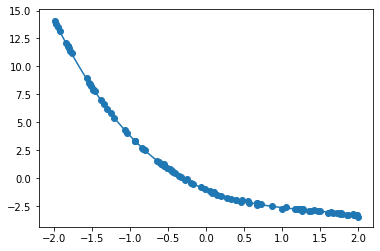

In [ ]:
#まずは初期値で
try_1()

++++++++++++++++++++++++++++++++++++++++++
d=-0.4x^3 + 1.6x^2 + -2.8x + -1
noise=0.05


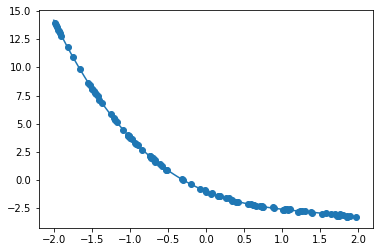

++++++++++++++++++++++++++++++++++++++++++
d=-0.4x^3 + 1.6x^2 + -2.8x + -1
noise=0.5


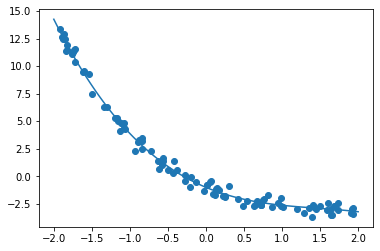

++++++++++++++++++++++++++++++++++++++++++
d=-0.4x^3 + 1.6x^2 + -2.8x + -1
noise=0.005


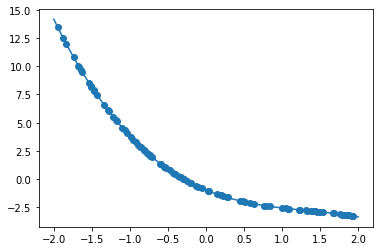

++++++++++++++++++++++++++++++++++++++++++
d=10x^3 + 1.6x^2 + -2.8x + -1
noise=0.05


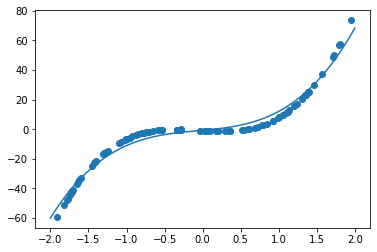

++++++++++++++++++++++++++++++++++++++++++
d=-0.4x^3 + 10x^2 + -2.8x + -1
noise=0.05


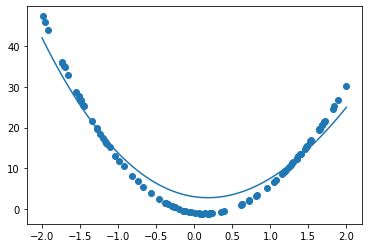

++++++++++++++++++++++++++++++++++++++++++
d=-0.4x^3 + 1.6x^2 + 10x + -1
noise=0.05


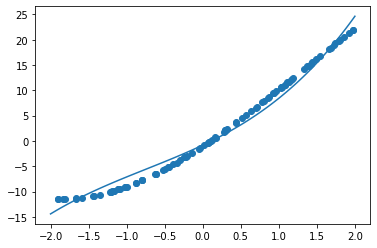

++++++++++++++++++++++++++++++++++++++++++
d=-0.4x^3 + 1.6x^2 + -2.8x + 10
noise=0.05


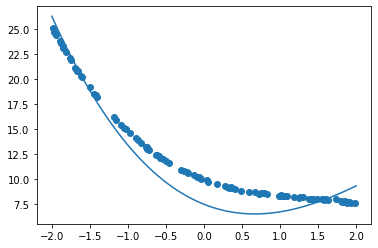

In [ ]:
#パラメータ変更でグラフ変化をザックリ観察
try_1(debug=False)

#ノイズが大きくなるとdの値にノイズが目立つ(だけのこと)
try_1(noise=0.5,debug=False)
try_1(noise=0.005,debug=False)

#dに対して特定の次数項を強くしただけ
#(dのグラフが変化、結果学習が収束し難くなる場合がある)
try_1(noise=0.05,d_3=10,debug=False)
try_1(noise=0.05,d_2=10,debug=False)
try_1(noise=0.05,d_1=10,debug=False)
try_1(noise=0.05,d_0=10,debug=False)

++++++++++++++++++++++++++++++++++++++++++
d=-0.4x^3 + 1.6x^2 + -2.8x + -1
noise=0.05
Generation: 100. 誤差 = 19.2272
Generation: 200. 誤差 = 15.872889
Generation: 300. 誤差 = 13.056727
Generation: 400. 誤差 = 10.712964
Generation: 500. 誤差 = 8.77814
Generation: 600. 誤差 = 7.1920185
Generation: 700. 誤差 = 5.898806
Generation: 800. 誤差 = 4.8484936
Generation: 900. 誤差 = 3.9978573
Generation: 1000. 誤差 = 3.3107445
Generation: 1100. 誤差 = 2.7575219
Generation: 1200. 誤差 = 2.3139842
Generation: 1300. 誤差 = 1.9601469
Generation: 1400. 誤差 = 1.6792623
Generation: 1500. 誤差 = 1.4571395
Generation: 1600. 誤差 = 1.2817509
Generation: 1700. 誤差 = 1.1429818
Generation: 1800. 誤差 = 1.0324602
Generation: 1900. 誤差 = 0.9433998
Generation: 2000. 誤差 = 0.8704311
Generation: 2100. 誤差 = 0.8094146
Generation: 2200. 誤差 = 0.7572452
Generation: 2300. 誤差 = 0.71165574
Generation: 2400. 誤差 = 0.6710328
Generation: 2500. 誤差 = 0.63425183
Generation: 2600. 誤差 = 0.6005376
Generation: 2700. 誤差 = 0.56935596
Generation: 2800. 誤差 = 0.5403322
G

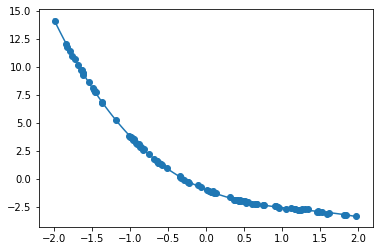

In [ ]:
#一応デフォルトと次数変化を比較(lossの収束具合をみる)
try_1()

++++++++++++++++++++++++++++++++++++++++++
d=-0.4x^3 + 1.6x^2 + -2.8x + 10
noise=0.05
Generation: 100. 誤差 = 149.10852
Generation: 200. 誤差 = 142.04779
Generation: 300. 誤差 = 135.44276
Generation: 400. 誤差 = 129.25699
Generation: 500. 誤差 = 123.455475
Generation: 600. 誤差 = 118.004776
Generation: 700. 誤差 = 112.87314
Generation: 800. 誤差 = 108.03066
Generation: 900. 誤差 = 103.44953
Generation: 1000. 誤差 = 99.10417
Generation: 1100. 誤差 = 94.971466
Generation: 1200. 誤差 = 91.03086
Generation: 1300. 誤差 = 87.26445
Generation: 1400. 誤差 = 83.656975
Generation: 1500. 誤差 = 80.19558
Generation: 1600. 誤差 = 76.86978
Generation: 1700. 誤差 = 73.67106
Generation: 1800. 誤差 = 70.59253
Generation: 1900. 誤差 = 67.62871
Generation: 2000. 誤差 = 64.77514
Generation: 2100. 誤差 = 62.028088
Generation: 2200. 誤差 = 59.38442
Generation: 2300. 誤差 = 56.84134
Generation: 2400. 誤差 = 54.396328
Generation: 2500. 誤差 = 52.047043
Generation: 2600. 誤差 = 49.79125
Generation: 2700. 誤差 = 47.626812
Generation: 2800. 誤差 = 45.551632
Generatio

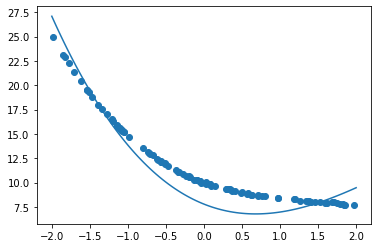

In [ ]:
#dの次数弄った場合のloss収束はやはり不十分
try_1(noise=0.05,d_0=10)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  次の式をモデルとして回帰を行おう
$$ y=30x^{2} +0.5x+0.2 $$<br>
-  誤差が収束するようiters_numやlearning_rateを調整しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#tryの為関数化
def try_2(iters_num=10000, learning_rate=0.001, debug=True):
    #iters_num = 10000
    plot_interval = 100

    # データを生成
    n=100
    x = np.random.rand(n).astype(np.float32) * 4 - 2
    d =  30 * x ** 3  + 0.5 * x + 0.2

    #  ノイズを加える
    noise = 0.05
    d = d + noise * np.random.randn(n)
    print("++++++++++++++++++++++++++++++++++++++++++")
    print("learning_rate={} iter={}".format(learning_rate,iters_num))

    # モデル
    # bを使っていないことに注意.
    xt = tf.placeholder(tf.float32, [None, 4])
    dt = tf.placeholder(tf.float32, [None, 1])
    W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
    y = tf.matmul(xt,W)

    # 誤差関数 平均２乗誤差
    loss = tf.reduce_mean(tf.square(y - dt))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train = optimizer.minimize(loss)

    # 初期化
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # 作成したデータをトレーニングデータとして準備
    d_train = d.reshape(-1,1)
    x_train = np.zeros([n, 4])
    for i in range(n):
        for j in range(4):
            x_train[i, j] = x[i]**j

    #  トレーニング
    for i in range(iters_num):
        if (i+1) % plot_interval == 0:
            loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
            W_val = sess.run(W)
            if debug: print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
        sess.run(train, feed_dict={xt:x_train,dt:d_train})

    if debug: print(W_val[::-1])
        
    # 予測関数
    def predict(x):
        result = 0.
        for i in range(0,4):
            result += W_val[i,0] * x ** i
        return result

    fig = plt.figure()
    subplot = fig.add_subplot(1,1,1)
    plt.scatter(x ,d)
    linex = np.linspace(-2,2,100)
    liney = predict(linex)
    subplot.plot(linex,liney)
    plt.show()

++++++++++++++++++++++++++++++++++++++++++
learning_rate=0.001 iter=10000
Generation: 100. 誤差 = 8193.371
Generation: 200. 誤差 = 8111.0356
Generation: 300. 誤差 = 8029.496
Generation: 400. 誤差 = 7948.739
Generation: 500. 誤差 = 7868.7485
Generation: 600. 誤差 = 7789.5117
Generation: 700. 誤差 = 7711.0137
Generation: 800. 誤差 = 7633.241
Generation: 900. 誤差 = 7556.183
Generation: 1000. 誤差 = 7479.825
Generation: 1100. 誤差 = 7404.156
Generation: 1200. 誤差 = 7329.1636
Generation: 1300. 誤差 = 7254.837
Generation: 1400. 誤差 = 7181.166
Generation: 1500. 誤差 = 7108.1406
Generation: 1600. 誤差 = 7035.748
Generation: 1700. 誤差 = 6963.9805
Generation: 1800. 誤差 = 6892.828
Generation: 1900. 誤差 = 6822.2817
Generation: 2000. 誤差 = 6752.333
Generation: 2100. 誤差 = 6682.9727
Generation: 2200. 誤差 = 6614.1924
Generation: 2300. 誤差 = 6545.9844
Generation: 2400. 誤差 = 6478.3413
Generation: 2500. 誤差 = 6411.2544
Generation: 2600. 誤差 = 6344.7183
Generation: 2700. 誤差 = 6278.7236
Generation: 2800. 誤差 = 6213.2656
Generation: 2900. 誤差 = 

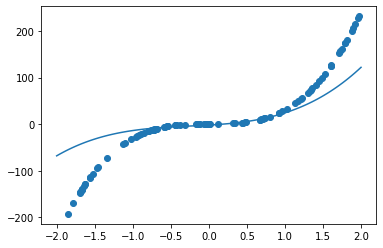

In [ ]:
#とりあえず実行
#lossが十分に収束できない
try_2()

++++++++++++++++++++++++++++++++++++++++++
learning_rate=0.01 iter=10000
Generation: 100. 誤差 = 7464.8506
Generation: 200. 誤差 = 6804.8486
Generation: 300. 誤差 = 6190.9023
Generation: 400. 誤差 = 5620.3057
Generation: 500. 誤差 = 5090.5977
Generation: 600. 誤差 = 4599.552
Generation: 700. 誤差 = 4145.1387
Generation: 800. 誤差 = 3725.4763
Generation: 900. 誤差 = 3338.7793
Generation: 1000. 誤差 = 2983.3323
Generation: 1100. 誤差 = 2657.4736
Generation: 1200. 誤差 = 2359.5962
Generation: 1300. 誤差 = 2088.1328
Generation: 1400. 誤差 = 1841.5626
Generation: 1500. 誤差 = 1618.4027
Generation: 1600. 誤差 = 1417.2076
Generation: 1700. 誤差 = 1236.5698
Generation: 1800. 誤差 = 1075.1118
Generation: 1900. 誤差 = 931.4918
Generation: 2000. 誤差 = 804.39966
Generation: 2100. 誤差 = 692.5598
Generation: 2200. 誤差 = 594.72845
Generation: 2300. 誤差 = 509.69717
Generation: 2400. 誤差 = 436.29846
Generation: 2500. 誤差 = 373.40173
Generation: 2600. 誤差 = 319.92148
Generation: 2700. 誤差 = 274.82007
Generation: 2800. 誤差 = 237.10988
Generation: 290

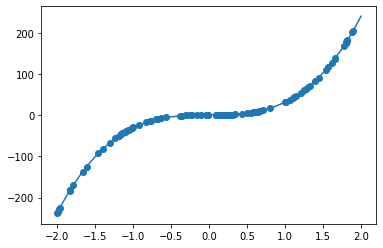

In [ ]:
#ハイパーパラメータを調整
#このくらいの学習率が適当っぽい
try_2(learning_rate=0.01)

++++++++++++++++++++++++++++++++++++++++++
learning_rate=0.001 iter=50000
Generation: 100. 誤差 = 9127.006
Generation: 200. 誤差 = 9041.242
Generation: 300. 誤差 = 8956.282
Generation: 400. 誤差 = 8872.107
Generation: 500. 誤差 = 8788.704
Generation: 600. 誤差 = 8706.055
Generation: 700. 誤差 = 8624.145
Generation: 800. 誤差 = 8542.959
Generation: 900. 誤差 = 8462.48
Generation: 1000. 誤差 = 8382.699
Generation: 1100. 誤差 = 8303.598
Generation: 1200. 誤差 = 8225.166
Generation: 1300. 誤差 = 8147.389
Generation: 1400. 誤差 = 8070.256
Generation: 1500. 誤差 = 7993.7524
Generation: 1600. 誤差 = 7917.8687
Generation: 1700. 誤差 = 7842.5923
Generation: 1800. 誤差 = 7767.9136
Generation: 1900. 誤差 = 7693.82
Generation: 2000. 誤差 = 7620.303
Generation: 2100. 誤差 = 7547.3506
Generation: 2200. 誤差 = 7474.9526
Generation: 2300. 誤差 = 7403.102
Generation: 2400. 誤差 = 7331.786
Generation: 2500. 誤差 = 7260.998
Generation: 2600. 誤差 = 7190.726
Generation: 2700. 誤差 = 7120.965
Generation: 2800. 誤差 = 7051.7026
Generation: 2900. 誤差 = 6982.9316
G

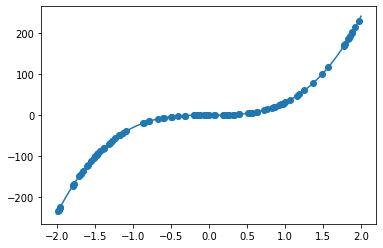

In [ ]:
#ハイパーパラメータを調整
#イテレーションを増やせばより収束へ向かう
try_2(iters_num=50000)

## 分類1層 (mnist)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  x：入力値, d：教師データ, W：重み, b：バイアス をそれぞれ定義しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[ True False  True ... False False False]
Generation: 1. 正解率 = 0.358
[ True  True  True ... False False False]
Generation: 2. 正解率 = 0.4041
[ True False  True ... False False  True]
Generation: 3. 正解率 = 0.5601
[ True  True  True ... False False  True]
Generation: 4. 正解率 = 0.6282
[ True  True  True ... False False  True]
Generation: 5. 正解率 = 0.6143
[ True  True  True ... False False  True]
Generation: 6. 正解率 = 0.6448
[ True  True  True ... False False  True]
Generation: 7. 正解率 = 0.7252
[ True False  True ... False False  True]
Generation: 8. 正解率 = 0.7022
[ True False  True ... False False  True]
Generation: 9. 正解率 = 0.7233
[ True  True  True ...  True False  True]
Generation: 10. 正解率 = 0.7665
[ True  True  True ... False False  True]
Generation: 11. 正解率 = 0.7648
[ True False  True ...  True False 

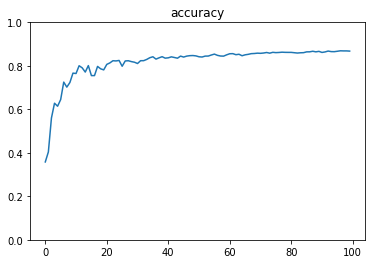

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 100
batch_size = 100
plot_interval = 1

# -------------- ここを補填 ------------------------
#分類3層のコードを参考にした
#なお、Tenorflowのplaceholderは後からsessionに渡す際に入力を確定できる
#ここではTrainDataとTestDataを後から代入する事で入力を確定させている(適応的にData数も確定)
#現時点ではとりあえずNoneを充てて次元数だけ決めている
#----------------------------------------------------------------------
x = tf.placeholder(tf.float32, [None, 784])  #入力画素数
d = tf.placeholder(tf.float32, [None, 10])   #Class数
W = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))
# ------------------------------------------------------

y = tf.nn.softmax(tf.matmul(x, W) + b)

# 交差エントロピー
cross_entropy = -tf.reduce_sum(d * tf.log(y), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 正誤を保存
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch})
    if (i+1) % plot_interval == 0:
        print(sess.run(correct, feed_dict={x: mnist.test.images, d: mnist.test.labels}))
        accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()        

## 分類3層 (mnist)


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  隠れ層のサイズを変更してみよう
-  optimizerを変更しよう<br>

tf.train.GradientDescentOptimizer<br>
`__init__(
    learning_rate,
    use_locking=False,
    name='GradientDescent'
)`

tf.train.MomentumOptimizer<br>
`__init__(
    learning_rate,
    momentum,
    use_locking=False,
    name='Momentum',
    use_nesterov=False
)`

tf.train.AdagradOptimizer<br>
`__init__(
    learning_rate,
    initial_accumulator_value=0.1,
    use_locking=False,
    name='Adagrad'
)`

tf.train.RMSPropOptimizer<br>
`__init__(
    learning_rate,
    decay=0.9,
    momentum=0.0,
    epsilon=1e-10,
    use_locking=False,
    centered=False,
    name='RMSProp'
)`

tf.train.AdamOptimizer<br>
`__init__(
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08,
    use_locking=False,
    name='Adam'
)`

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt


def try_3(opt_mode=0, hidden_layer_size_1=600, hidden_layer_size_2=300,learning_rate=1e-4,debug=True):
    # logging levelを変更
    tf.logging.set_verbosity(tf.logging.ERROR)

    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

    iters_num = 3000
    batch_size = 100
    plot_interval = 100

    #hidden_layer_size_1 = 600
    #hidden_layer_size_2 = 300

    dropout_rate = 0.5

    x = tf.placeholder(tf.float32, [None, 784])
    d = tf.placeholder(tf.float32, [None, 10])
    W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
    W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
    W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

    b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
    b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
    b3 = tf.Variable(tf.zeros([10]))

    z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
    z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

    keep_prob = tf.placeholder(tf.float32)
    drop = tf.nn.dropout(z2, keep_prob)

    y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
    loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))

    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("hl1={} hl2={}".format( hidden_layer_size_1, hidden_layer_size_2))
    optimizer=None
    if opt_mode==0:
        print("Adam")
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    elif opt_mode==1:
        print("GradientDescent")
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    elif opt_mode==2:
        print("Adagrad")
        optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
    elif opt_mode==3:
        print("RMSProp")
        optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
    else:
        print("Momentum")
        optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=learning_rate)

    train = optimizer.minimize(loss)
    correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    accuracies = []
    for i in range(iters_num):
        x_batch, d_batch = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
        if (i+1) % plot_interval == 0:
            accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
            accuracies.append(accuracy_val)
            if debug:print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
        
    lists = range(0, iters_num, plot_interval)
    plt.plot(lists, accuracies)
    plt.title("accuracy")
    plt.ylim(0, 1.0)
    plt.grid()
    plt.show()            

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
++++++++++++++++++++++++++++++++++++++++++++++++++++++
hl1=600 hl2=300
Adam
Generation: 100. 正解率 = 0.1245
Generation: 200. 正解率 = 0.3492
Generation: 300. 正解率 = 0.4411
Generation: 400. 正解率 = 0.5035
Generation: 500. 正解率 = 0.6366
Generation: 600. 正解率 = 0.6689
Generation: 700. 正解率 = 0.699
Generation: 800. 正解率 = 0.7392
Generation: 900. 正解率 = 0.7682
Generation: 1000. 正解率 = 0.7945
Generation: 1100. 正解率 = 0.8023
Generation: 1200. 正解率 = 0.8252
Generation: 1300. 正解率 = 0.8339
Generation: 1400. 正解率 = 0.8471
Generation: 1500. 正解率 = 0.8539
Generation: 1600. 正解率 = 0.8607
Generation: 1700. 正解率 = 0.8641
Generation: 1800. 正解率 = 0.8697
Generation: 1900. 正解率 = 0.8736
Generation: 2000. 正解率 = 0.8768
Generation: 2100. 正解率 = 0.8817
Generation: 2200. 正解率 = 0.8846
Generation: 2300. 正解率 = 0.8871
Generation: 2400. 正解率 = 0.8

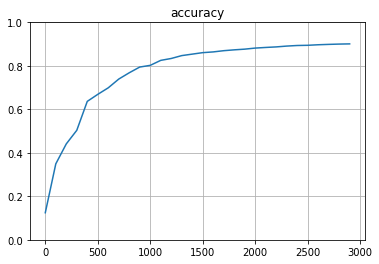

In [ ]:
#まずはデフォルトの状態で
try_3()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
++++++++++++++++++++++++++++++++++++++++++++++++++++++
hl1=300 hl2=100
Adam


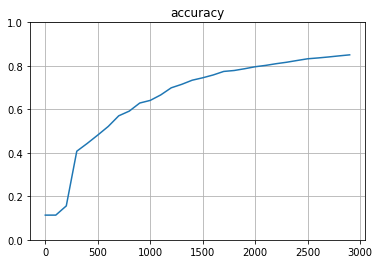

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
++++++++++++++++++++++++++++++++++++++++++++++++++++++
hl1=1200 hl2=600
Adam


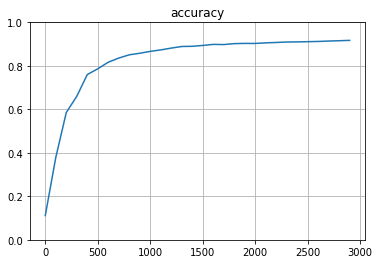

In [ ]:
#隠れ層のサイズを弄って比較
#optimizerはAdam固定
#隠れ層を減らすと精度が落ちる(増やすと収束が速くなる)
try_3(hidden_layer_size_1=300,hidden_layer_size_2=100,debug=False)
try_3(hidden_layer_size_1=1200,hidden_layer_size_2=600,debug=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
++++++++++++++++++++++++++++++++++++++++++++++++++++++
hl1=600 hl2=300
Adam


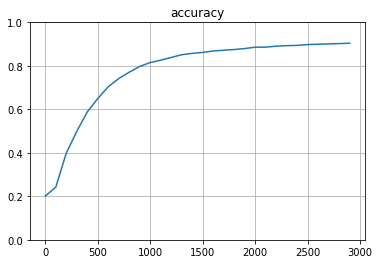

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
++++++++++++++++++++++++++++++++++++++++++++++++++++++
hl1=600 hl2=300
GradientDescent


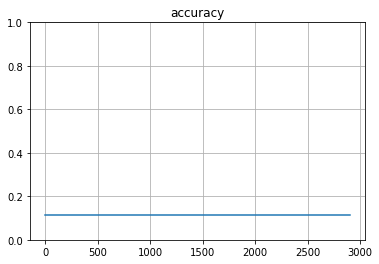

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
++++++++++++++++++++++++++++++++++++++++++++++++++++++
hl1=600 hl2=300
Adagrad


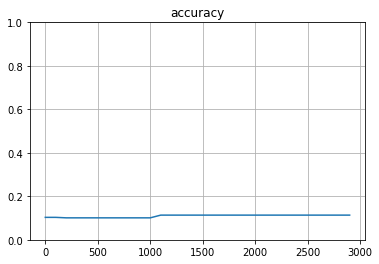

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
++++++++++++++++++++++++++++++++++++++++++++++++++++++
hl1=600 hl2=300
RMSProp


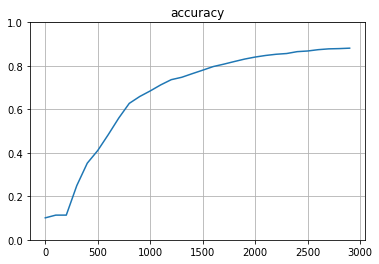

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
++++++++++++++++++++++++++++++++++++++++++++++++++++++
hl1=600 hl2=300
Momentum


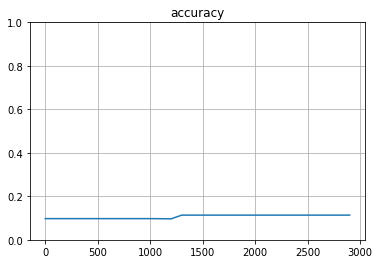

In [ ]:
#optimizerを変更してみる
#RMSPropとAdam以外は全然ダメという結果になった
#Adamが一番安定している様に見える
#
#他のoptimizerもパラメータ弄る余地はあるかもしれないけど追いかけない
for opt_mode in range(5):try_3(opt_mode=opt_mode,debug=False)

## 分類CNN (mnist)
conv - relu - pool - conv - relu - pool - <br>
affin - relu - dropout - affin - softmax<br>

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  ドロップアウト率を0に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


def try_4(dropout_rate = 0.5,debug=True):
    # logging levelを変更
    tf.logging.set_verbosity(tf.logging.ERROR)

    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
    import matplotlib.pyplot as plt

    iters_num = 300
    batch_size = 100
    plot_interval = 10

    #dropout_rate = 0.5
    print("dropout_rate={}".format(dropout_rate))

    # placeholder
    x = tf.placeholder(tf.float32, shape=[None, 784])
    d = tf.placeholder(tf.float32, shape=[None, 10])

    # 画像を784の一次元から28x28の二次元に変換する
    # 画像を28x28にreshape
    x_image = tf.reshape(x, [-1,28,28,1])

    # 第一層のweightsとbiasのvariable
    W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
    b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

    # 第一層のconvolutionalとpool
    # strides[0] = strides[3] = 1固定
    h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
    # プーリングサイズ n*n にしたい場合 ksize=[1, n, n, 1]
    h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # 第二層
    W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
    b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
    h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
    h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # 第一層と第二層でreduceされてできた特徴に対してrelu
    W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
    b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    # Dropout
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    # 出来上がったものに対してSoftmax
    W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
    b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
    y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

    # 交差エントロピー
    loss = -tf.reduce_sum(d * tf.log(y_conv))

    train = tf.train.AdamOptimizer(1e-4).minimize(loss)

    correct = tf.equal(tf.argmax(y_conv,1), tf.argmax(d,1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)


    accuracies = []
    for i in range(iters_num):
        x_batch, d_batch = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
        if (i+1) % plot_interval == 0:
            accuracy_val = sess.run(accuracy, feed_dict={x:x_batch, d: d_batch, keep_prob: 1.0})
            accuracies.append(accuracy_val)
            if debug: print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
        
        
    lists = range(0, iters_num, plot_interval)
    plt.plot(lists, accuracies)
    plt.title("accuracy")
    plt.ylim(0, 1.0)
    plt.grid()
    plt.show()                

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
dropout_rate=0.5
Generation: 10. 正解率 = 0.26
Generation: 20. 正解率 = 0.57
Generation: 30. 正解率 = 0.69
Generation: 40. 正解率 = 0.74
Generation: 50. 正解率 = 0.78
Generation: 60. 正解率 = 0.81
Generation: 70. 正解率 = 0.88
Generation: 80. 正解率 = 0.82
Generation: 90. 正解率 = 0.87
Generation: 100. 正解率 = 0.83
Generation: 110. 正解率 = 0.92
Generation: 120. 正解率 = 0.87
Generation: 130. 正解率 = 0.88
Generation: 140. 正解率 = 0.94
Generation: 150. 正解率 = 0.93
Generation: 160. 正解率 = 0.88
Generation: 170. 正解率 = 0.9
Generation: 180. 正解率 = 0.93
Generation: 190. 正解率 = 0.88
Generation: 200. 正解率 = 0.98
Generation: 210. 正解率 = 0.95
Generation: 220. 正解率 = 0.9
Generation: 230. 正解率 = 0.89
Generation: 240. 正解率 = 0.91
Generation: 250. 正解率 = 0.91
Generation: 260. 正解率 = 0.95
Generation: 270. 正解率 = 0.91
Generation: 280. 正解率 = 0.89
Generation: 290.

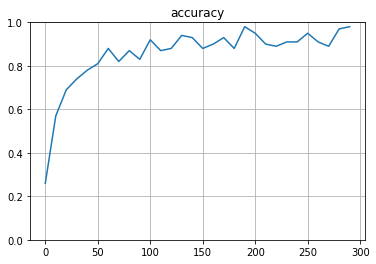

In [ ]:
#デフォルトのdropout率
try_4()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
dropout_rate=0
Generation: 10. 正解率 = 0.32
Generation: 20. 正解率 = 0.65
Generation: 30. 正解率 = 0.74
Generation: 40. 正解率 = 0.82
Generation: 50. 正解率 = 0.87
Generation: 60. 正解率 = 0.87
Generation: 70. 正解率 = 0.86
Generation: 80. 正解率 = 0.84
Generation: 90. 正解率 = 0.9
Generation: 100. 正解率 = 0.87
Generation: 110. 正解率 = 0.89
Generation: 120. 正解率 = 0.88
Generation: 130. 正解率 = 0.85
Generation: 140. 正解率 = 0.87
Generation: 150. 正解率 = 0.94
Generation: 160. 正解率 = 0.89
Generation: 170. 正解率 = 0.95
Generation: 180. 正解率 = 0.86
Generation: 190. 正解率 = 0.89
Generation: 200. 正解率 = 0.89
Generation: 210. 正解率 = 0.95
Generation: 220. 正解率 = 0.94
Generation: 230. 正解率 = 0.92
Generation: 240. 正解率 = 0.92
Generation: 250. 正解率 = 0.97
Generation: 260. 正解率 = 0.94
Generation: 270. 正解率 = 0.97
Generation: 280. 正解率 = 0.94
Generation: 290. 

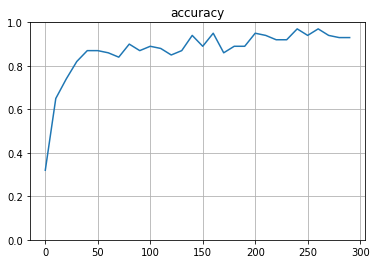

In [ ]:
#dropoutを0にすると
#  あまり変化がないように見えるが少し学習の進みが速くなる
#  振る舞いはネットワーク現物次第という事で理解しておく
try_4(dropout_rate=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
dropout_rate=0.5


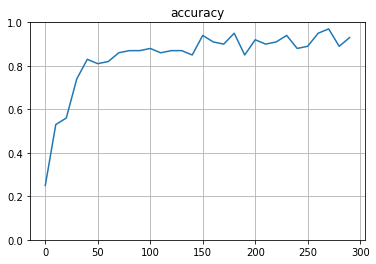

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
dropout_rate=0.6000000000000001


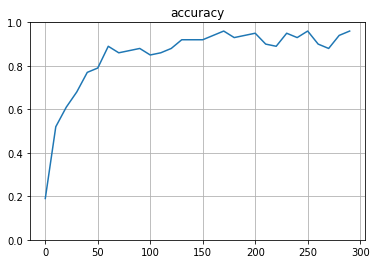

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
dropout_rate=0.7000000000000001


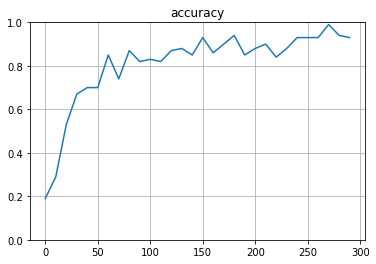

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
dropout_rate=0.8


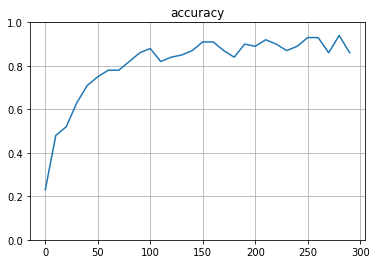

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
dropout_rate=0.9


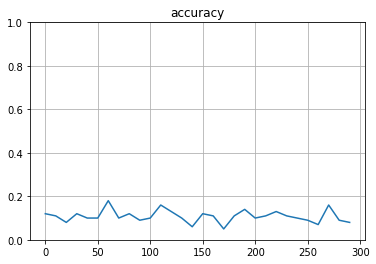

In [ ]:
#dropoutを1に近づけるとどうなるの?実験
#dropout引数に浮動小数点誤差が見えてしまうけど微差なので気にせず(ご容赦を)
#dropout率上げると徐々に残差が見えてくるかもしれず
#0.9までやるとやりすぎという事になる
for i in range(5,10,1):try_4(dropout_rate=i * 0.1,debug=False)